In [1]:
import pandas as pd
import numpy as np
import glob
import importlib

## BDT training

In [2]:
CAND_DIR = "cand_loose"
corrections = ["centJER", "jes_up", "jes_down", "jes_up_old", "jes_down_old", "jer_up", "jer_down", "tau_eup", "tau_edown"]

def get_samples():

    files = glob.glob( CAND_DIR + "/*.h5")
    samples = {}
    for sample in files:
        sample_name = sample.split("/")[-1][:-3]
        print(sample_name)
        if (sample_name != "Data") & (sample_name != "QCD"):
            for key in ["central", "met_up", "met_down"] + corrections:
                samples[sample_name + "_" + key] = pd.read_hdf(sample, sample_name + "_" + key)
        else:
            samples[sample_name] = pd.read_hdf(sample)
            
    return samples

In [13]:
samples = get_samples()

Data
QCD
STJets
TTJets_bkg
TTJets_signal
WZJets


In [4]:
samples.keys()

dict_keys(['Data', 'QCD', 'STJets_central', 'STJets_met_up', 'STJets_met_down', 'STJets_centJER', 'STJets_jes_up', 'STJets_jes_down', 'STJets_jes_up_old', 'STJets_jes_down_old', 'STJets_jer_up', 'STJets_jer_down', 'STJets_tau_eup', 'STJets_tau_edown', 'TTJets_bkg_central', 'TTJets_bkg_met_up', 'TTJets_bkg_met_down', 'TTJets_bkg_centJER', 'TTJets_bkg_jes_up', 'TTJets_bkg_jes_down', 'TTJets_bkg_jes_up_old', 'TTJets_bkg_jes_down_old', 'TTJets_bkg_jer_up', 'TTJets_bkg_jer_down', 'TTJets_bkg_tau_eup', 'TTJets_bkg_tau_edown', 'TTJets_signal_central', 'TTJets_signal_met_up', 'TTJets_signal_met_down', 'TTJets_signal_centJER', 'TTJets_signal_jes_up', 'TTJets_signal_jes_down', 'TTJets_signal_jes_up_old', 'TTJets_signal_jes_down_old', 'TTJets_signal_jer_up', 'TTJets_signal_jer_down', 'TTJets_signal_tau_eup', 'TTJets_signal_tau_edown', 'WZJets_central', 'WZJets_met_up', 'WZJets_met_down', 'WZJets_centJER', 'WZJets_jes_up', 'WZJets_jes_down', 'WZJets_jes_up_old', 'WZJets_jes_down_old', 'WZJets_jer_

In [45]:
samples["TTJets_signal_centJER"]["pdf_up"] = samples["TTJets_signal_centJER"]["pdf_up"].fillna(0.)
samples["TTJets_signal_centJER"]["pdf_down"] = samples["TTJets_signal_centJER"]["pdf_down"].fillna(0.)
samples["TTJets_bkg_centJER"]["pdf_up"] = samples["TTJets_bkg_centJER"]["pdf_up"].fillna(0.)
samples["TTJets_bkg_centJER"]["pdf_down"] = samples["TTJets_bkg_centJER"]["pdf_down"].fillna(0.)

In [46]:
samples["TTJets_bkg_centJER"]

,Jet_pt,Jet_px,Jet_py,Jet_pz,Jet_e,Jet_eta,Jet_phi,Jet_mass,Jet_csvDisc,Jet_flavour,...,trigger_weight_up,trigger_weight_down,norm,norm_up,norm_down,pdf,pdf_up,pdf_down,bdt,weight
32927,"[204.87562388873812, 124.68447014363846, 119.1...","[91.34737179481166, -101.29261359561531, 112.3...","[-183.38396283865012, -72.70504809020073, -39....","[143.1986706202869, 178.11641004247818, -85.32...","[252.83663942116348, 218.01718200859557, 147.0...","[0.6518096, 1.1544578, -0.6658779, 1.3393233, ...","[-1.1086532, -2.5190382, -0.33954442, 0.102105...","[38.03277122775171, 16.118814036396543, 12.697...","[0.0013835867, 0.124834284, 0.90095145, 0.0958...","[21, 2, 5, 21, 21, -2]",...,0.770111,0.721674,12.424085,13.181651,11.666519,NaN,0.000000,0.000000,0.911198,NaN
34013,"[173.67668499052343, 84.58687619039301, 47.103...","[-151.69914982643297, 19.20402647928155, 42.78...","[84.56333868332847, 82.3780613179112, -19.7072...","[-44.215757984570004, -451.48826785291146, 3.0...","[180.36668792285172, 459.3912260173279, 47.707...","[-0.2519137, -2.3765793, 0.06399892, -2.242714...","[2.6330545, 1.3417661, -0.43166733, -0.3030332...","[20.335196598823586, 6.609994369275967, 6.9396...","[0.99440837, 0.28227764, 0.14659004, 0.4940149...","[-5, 2, 21, 2, 5, 21]",...,0.448644,0.436040,12.424085,13.181651,11.666519,NaN,0.000000,0.000000,0.139483,NaN
54347,"[121.10369577135498, 100.84948487207657, 76.06...","[36.98600515016506, 29.667472249978204, -73.26...","[115.31756604743218, -96.38703226760401, -20.4...","[49.545780807824244, 61.903811155665046, -91.8...","[131.8311819022842, 121.40662256263118, 119.67...","[0.3984884, 0.58064246, -1.0210031, 0.039307315]","[1.2604297, -1.2722033, -2.869444, -2.4779315]","[16.080177903167396, 27.14531992423008, 9.7962...","[0.9001378, 0.059237786, 0.14729348, 0.9638657]","[-5, 21, -2, 5]",...,0.739425,0.716902,12.424085,13.181651,11.666519,4.218756,0.073249,0.095909,0.644323,0.007516
6579,"[181.4883402753767, 107.08525947475437, 51.561...","[-27.468339900523855, -91.12152745165187, 48.2...","[179.39762194562744, -56.25051728242072, 18.19...","[-116.71876891531521, 236.78562354114175, -40....","[218.14970889082431, 260.35291676454193, 66.03...","[-0.6054467, 1.5342803, -0.7169539, -0.978053]","[1.7227306, -2.58854, 0.36070135, 2.7788725]","[32.06262041282753, 15.778480184015905, 9.1765...","[0.9957831, 0.9983884, 0.06481425, 0.12449157]","[5, -5, 2, 21]",...,0.666402,0.650661,12.424085,13.181651,11.666519,1.592177,0.088160,0.078595,0.873845,0.007028
6814,"[155.15207121235107, 131.97502918032842, 48.45...","[154.95425186286525, 11.066043764897659, -45.9...","[-7.832259881206697, 131.51027098242287, -15.2...","[-285.29953990641945, 676.543888011961, -1.375...","[325.4134185469577, 689.3950890020931, 49.0654...","[-1.3691481, 2.3369122, -0.028378712, 0.9094368]","[-0.050502647, 1.4868482, -2.8204002, -1.976029]","[20.637437910135077, 11.683358285158647, 7.604...","[0.99999183, 0.03998726, 0.43767932, 0.07122507]","[-5, 2, 4, 21]",...,0.622422,0.524994,12.424085,13.181651,11.666519,NaN,0.000000,0.000000,0.862008,NaN
11667,"[152.79572267536423, 134.37506949238013, 103.3...","[-96.54928758975807, -102.63460016974301, 101....","[118.42621680998097, -86.73406202568785, 20.72...","[274.0740197649449, 12.378694372010875, 29.936...","[314.3552660833361, 135.92873334754287, 108.82...","[1.3473909, 0.09199067, 0.28568166, -1.8935595]","[2.2547789, -2.439964, 0.20183273, -0.011746518]","[18.871541024873295, 16.33190191988251, 16.133...","[0.88790286, 0.99968696, 0.99530053, 0.28175715]","[5, -5, -5, 2]",...,0.845089,0.711599,12.424085,13.181651,11.666519,5.324598,0.113311,0.100419,0.675733,0.007809
11796,"[287.19019641372506, 234.80007910200948, 212.9...","[-240.68044818304205, 212.43181432986395, -208...","[156.6880089228343, 100.01901148060506, 44.632...","[54.712545772925736, 165.51494843397202, 200.3...","[293.01152665497335, 289.00078012301435, 292.7...","[0.18937583, 0.65669143, 0.8387746, -1.0106525...","[2.5645, 0.44

In [47]:
import ml

Prepare training data
['Jet_pt', 'Jet_px', 'Jet_py', 'Jet_pz', 'Jet_e', 'Jet_eta', 'Jet_phi', 'Jet_mass', 'Jet_csvDisc', 'Jet_flavour', 'Tau_pt', 'Tau_px', 'Tau_py', 'Tau_pz', 'Tau_e', 'Tau_eta', 'Tau_phi', 'Tau_mass', 'Tau_charge', 'MET_pt', 'MET_px', 'MET_py', 'MET_pz', 'MET_e', 'MET_met', 'event', 'run', 'luminosityBlock', 'HLT_QuadJet40_IsoPFTau40', 'HLT_QuadJet45_IsoPFTau45', 'genEvent_tmeme', 'nJets', 'Jet_nbtags', 'ht', 'aplanarity', 'sphericity', 'chargeEta', 'met', 'deltaPhiTauMet', 'mt', 'mTauJet', 'Jet_btagSF', 'Jet_btagSF_up', 'Jet_btagSF_down', 'Jet_beff', 'Jet_btag_weight1', 'Jet_btag_weight1_up', 'Jet_btag_weight1_down', 'trigger_weight', 'trigger_weight_up', 'trigger_weight_down', 'norm', 'norm_up', 'norm_down', 'train_flag', 'label', 'bdt', 'weight']


/eos/home-l/llayer/cmsopen/columnar/ml.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  signal_train["weights"] = signal_train['trigger_weight'] * signal_train['Jet_btag_weight1']
/eos/home-l/llayer/cmsopen/columnar/ml.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  signal_train["weights"] = signal_train["weights"] * (1. / np.mean(signal_train["weights"]))
/eos/home-l/llayer/cmsopen/columnar/ml.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

33       0.932894
36       0.737012
46       0.876736
57       1.235574
64       1.336095
71       1.279690
78       1.083948
82       0.948553
99       0.504405
107      1.230109
123      0.214850
142      1.091998
145      1.001269
147      1.187127
154      0.929673
163      1.261768
165      0.537870
170      1.186776
175      0.999531
180      0.985965
187      0.923965
201      1.324803
207      0.979370
209      1.056826
218      1.031091
220      0.400777
240      1.063887
263      1.102605
264      1.024308
279      1.260424
           ...   
11175    1.405636
11177    0.904985
11178    0.830897
11179    0.941587
11182    0.973137
11185    0.956628
11191    0.920334
11194    1.170192
11195    0.963186
11197    0.864869
11198    1.051296
11199    0.853454
11203    0.899441
11205    1.100890
11208    0.983605
11209    0.895063
11211    0.879296
11212    0.920123
11214    1.142000
11217    0.899367
11220    0.850724
11221    0.987310
11222    1.127263
11223    0.900025
11225    0

/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Predicting...


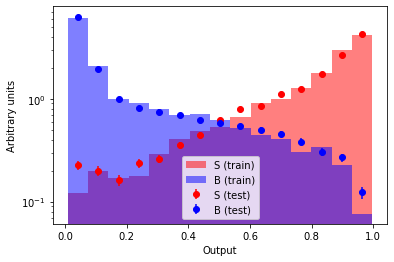

In [48]:
importlib.reload(ml)
ml.train(samples)

In [16]:
samples.keys()

dict_keys(['Data', 'QCD', 'STJets_central', 'STJets_met_up', 'STJets_met_down', 'STJets_centJER', 'STJets_jes_up', 'STJets_jes_down', 'STJets_jes_up_old', 'STJets_jes_down_old', 'STJets_jer_up', 'STJets_jer_down', 'STJets_tau_eup', 'STJets_tau_edown', 'TTJets_bkg_central', 'TTJets_bkg_met_up', 'TTJets_bkg_met_down', 'TTJets_bkg_centJER', 'TTJets_bkg_jes_up', 'TTJets_bkg_jes_down', 'TTJets_bkg_jes_up_old', 'TTJets_bkg_jes_down_old', 'TTJets_bkg_jer_up', 'TTJets_bkg_jer_down', 'TTJets_bkg_tau_eup', 'TTJets_bkg_tau_edown', 'TTJets_signal_central', 'TTJets_signal_met_up', 'TTJets_signal_met_down', 'TTJets_signal_centJER', 'TTJets_signal_jes_up', 'TTJets_signal_jes_down', 'TTJets_signal_jes_up_old', 'TTJets_signal_jes_down_old', 'TTJets_signal_jer_up', 'TTJets_signal_jer_down', 'TTJets_signal_tau_eup', 'TTJets_signal_tau_edown', 'WZJets_central', 'WZJets_met_up', 'WZJets_met_down', 'WZJets_centJER', 'WZJets_jes_up', 'WZJets_jes_down', 'WZJets_jes_up_old', 'WZJets_jes_down_old', 'WZJets_jer_

## Histograms

In [49]:
import plot

In [50]:
variables = [
    {"var_name" : "bdt", "bins" : 15, "xlow" : 0., "xup" : 1., "xtitle" : "bdt"}
]

In [51]:
plot.vars_to_histos(samples, variables, file_name = "bdt_nb")

Data bdt None
QCD bdt None
STJets_central bdt None
STJets_met_up bdt None
STJets_met_down bdt None
STJets_centJER bdt None
STJets_centJER bdt btag_up
STJets_centJER bdt btag_down
STJets_centJER bdt trigger_up
STJets_centJER bdt trigger_down
STJets_centJER bdt xsec_up
STJets_centJER bdt xsec_down
STJets_jes_up bdt None
STJets_jes_down bdt None
STJets_jes_up_old bdt None
STJets_jes_down_old bdt None
STJets_jer_up bdt None
STJets_jer_down bdt None
STJets_tau_eup bdt None
STJets_tau_edown bdt None
TTJets_bkg_central bdt None
TTJets_bkg_met_up bdt None
TTJets_bkg_met_down bdt None
TTJets_bkg_centJER bdt None
TTJets_bkg_centJER bdt btag_up
TTJets_bkg_centJER bdt btag_down
TTJets_bkg_centJER bdt trigger_up
TTJets_bkg_centJER bdt trigger_down
TTJets_bkg_centJER bdt xsec_up
TTJets_bkg_centJER bdt xsec_down
TTJets_bkg_centJER bdt pdf_up
TTJets_bkg_centJER bdt pdf_down
TTJets_bkg_jes_up bdt None
TTJets_bkg_jes_down bdt None
TTJets_bkg_jes_up_old bdt None
TTJets_bkg_jes_down_old bdt None
TTJets_bk

In [21]:
import ROOT

In [31]:
f.ls()

TFile**		histos/bdt_nb.root	
 TFile*		histos/bdt_nb.root	
  OBJ: TH1D	TTJets_signal_centJER_bdt	TTJets_signal_centJER_bdt : 0 at: 0xceca7fa0
  KEY: TH1D	Data_bdt;1	Data_bdt
  KEY: TH1D	QCD_bdt;1	QCD_bdt
  KEY: TH1D	STJets_central_bdt;1	STJets_central_bdt
  KEY: TH1D	STJets_met_up_bdt;1	STJets_met_up_bdt
  KEY: TH1D	STJets_met_down_bdt;1	STJets_met_down_bdt
  KEY: TH1D	STJets_centJER_bdt;1	STJets_centJER_bdt
  KEY: TH1D	STJets_centJER_btag_up_bdt;1	STJets_centJER_bdt_btag_up
  KEY: TH1D	STJets_centJER_btag_down_bdt;1	STJets_centJER_bdt_btag_down
  KEY: TH1D	STJets_centJER_trigger_up_bdt;1	STJets_centJER_bdt_trigger_up
  KEY: TH1D	STJets_centJER_trigger_down_bdt;1	STJets_centJER_bdt_trigger_down
  KEY: TH1D	STJets_centJER_xsec_up_bdt;1	STJets_centJER_bdt_xsec_up
  KEY: TH1D	STJets_centJER_xsec_down_bdt;1	STJets_centJER_bdt_xsec_down
  KEY: TH1D	STJets_jes_up_bdt;1	STJets_jes_up_bdt
  KEY: TH1D	STJets_jes_down_bdt;1	STJets_jes_down_bdt
  KEY: TH1D	STJets_jes_up_old_bdt;1	STJets_jes_up_old

In [22]:
f = ROOT.TFile("histos/bdt_nb.root")

In [32]:
h = f.Get("TTJets_signal_centJER_pdf_up_bdt")

In [33]:
type(h)

ROOT.TH1D

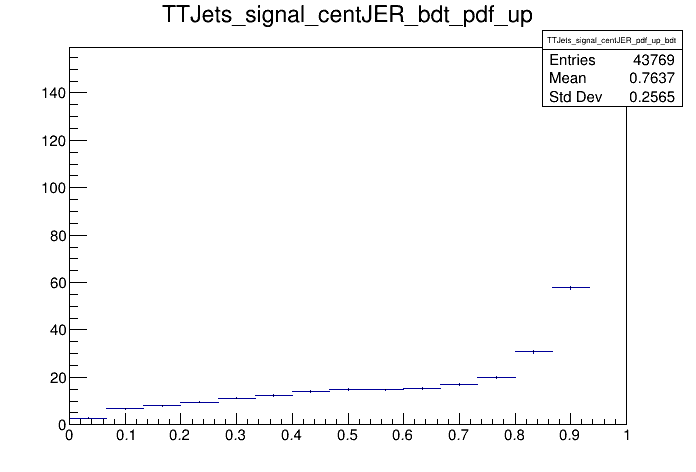

In [34]:
c = ROOT.TCanvas()
h.Draw()
c.Draw()

## Stack

In [2]:
import stack

Welcome to JupyROOT 6.20/06


In [5]:
#importlib.reload(stack)
sample_names = ["TTJets_bkg", "WZJets", "STJets", "QCD", "TTJets_signal"]
sfs = {}
sfs["TTJets_signal"] = 1.
sfs["QCD"] = 0.73
for var in variables:
    stack.plot( "histos/" + "bdt_nb" + ".root", var["var_name"], var["xtitle"], sample_names, sfs=sfs, corr = "central" )

Scaling QCD by 0.73
Scaling TTJets_signal by 1.0


Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file stacks_corr/bdt_central_postfit.png has been created


## Fit

In [1]:
import fit

Welcome to JupyROOT 6.20/06


In [5]:
#importlib.reload(fit)

syst=True

sample_names = ["Data", "TTJets_bkg", "WZJets", "STJets", "QCD", "TTJets_signal"]
sf_tt_sig, sf_qcd = fit.fit("histos/" + "bdt_nb" + ".root", sample_names, "bdt", corr="centJER")
sfs = {}
sfs["TTJets_signal"] = sf_tt_sig
sfs["QCD"] = sf_qcd
#stack.plot( "histos/" + file_name + ".root", var, sample_names[1:], sfs )

if syst:

    # PU - not applied
    # JES/JER/TauScale/MET
    for c in  ["jes_up", "jes_down", "jes_up_old", "jes_down_old", "jer_up", "jer_down", "tau_eup", "tau_edown",
               "met_up", "met_down"]:
        sf_tt_sig, sf_qcd = fit.fit("histos/" + "bdt_nb" + ".root", sample_names, "bdt", corr=c)     
        sfs["TTJets_signal_" + c] = sf_tt_sig
        
    # B-tagging, Trigger stat, XSEC theory, PDF
    for c in ["btag_up", "btag_down", "trigger_up", "trigger_down", "xsec_up", "xsec_down", "pdf_up", "pdf_down"]:
        sf_tt_sig, sf_qcd = fit.fit("histos/" + "bdt_nb" + ".root", sample_names, "bdt", corr = "centJER_" + c)     
        sfs["TTJets_signal_" + c] = sf_tt_sig

Data_bdt
Data 3343.0
TTJets_bkg_centJER_bdt
TTJets_bkg 143.25487033779973
WZJets_centJER_bdt
WZJets 63.34294793514246
STJets_centJER_bdt
STJets 30.165996274894933
QCD_bdt
QCD 3805.6229518908167
TTJets_signal_centJER_bdt
TTJets_signal 347.12811795563914
scale factor TTbar tau(h) QQ  0.9498163365715357 +- 0.07868964803335972
scale factor MultiJet  0.7295857375347846 +- 0.007177639448185538
Data_bdt
Data 3343.0
TTJets_bkg_jes_up_bdt
TTJets_bkg 145.76828344086599
WZJets_jes_up_bdt
WZJets 65.15419346825848
STJets_jes_up_bdt
STJets 30.93516031056953
QCD_bdt
QCD 3805.6229518908167
TTJets_signal_jes_up_bdt
TTJets_signal 354.6369360690976
scale factor TTbar tau(h) QQ  0.934542321705306 +- 0.07737521583061348
scale factor MultiJet  0.7277965190449847 +- 0.007210412018410897
Data_bdt
Data 3343.0
TTJets_bkg_jes_down_bdt
TTJets_bkg 140.42892027660227
WZJets_jes_down_bdt
WZJets 62.43401415239288
STJets_jes_down_bdt
STJets 29.51435730081597
QCD_bdt
QCD 3805.6229518908167
TTJets_signal_jes_down_bdt
TT

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure al

In [6]:
sfs

{'TTJets_signal': 0.9498163365715357,
 'QCD': 0.7295857375347846,
 'TTJets_signal_jes_up': 0.934542321705306,
 'TTJets_signal_jes_down': 0.9729471943663579,
 'TTJets_signal_jes_up_old': 0.9356142177986027,
 'TTJets_signal_jes_down_old': 0.9762221517790238,
 'TTJets_signal_jer_up': 0.9578031888073447,
 'TTJets_signal_jer_down': 0.9485860312863744,
 'TTJets_signal_tau_eup': 0.9266756195673239,
 'TTJets_signal_tau_edown': 1.0134400679989453,
 'TTJets_signal_met_up': 0.9501342534742446,
 'TTJets_signal_met_down': 0.9466638813383068,
 'TTJets_signal_btag_up': 0.9252252269861123,
 'TTJets_signal_btag_down': 0.9757866323493062,
 'TTJets_signal_trigger_up': 0.9139763807994435,
 'TTJets_signal_trigger_down': 0.9867758507219538,
 'TTJets_signal_xsec_up': 0.8738966660686404,
 'TTJets_signal_xsec_down': 1.0357898095499873,
 'TTJets_signal_pdf_up': 0.8387484922480595,
 'TTJets_signal_pdf_down': 1.0757674438201428}

In [7]:
for sample, sf in sfs.items():
    if "TTJets" in sample:
        print( sample, (sfs["TTJets_signal"] - sf) / sfs["TTJets_signal"] )

TTJets_signal 0.0
TTJets_signal_jes_up 0.01608101932776067
TTJets_signal_jes_down -0.02435297952266801
TTJets_signal_jes_up_old 0.014952489472014314
TTJets_signal_jes_down_old -0.027800969714632105
TTJets_signal_jer_up -0.008408838559924517
TTJets_signal_jer_down 0.0012953086168240118
TTJets_signal_tau_eup 0.024363359644603226
TTJets_signal_tau_edown -0.06698529913379488
TTJets_signal_met_up -0.0003347140815206828
TTJets_signal_met_down 0.0033190155947496764
TTJets_signal_btag_up 0.025890383896941264
TTJets_signal_btag_down -0.027342439562066296
TTJets_signal_trigger_up 0.037733564260918465
TTJets_signal_trigger_down -0.038912274644409085
TTJets_signal_xsec_up 0.07993089566866748
TTJets_signal_xsec_down -0.0905158920394885
TTJets_signal_pdf_up 0.11693612759324355
TTJets_signal_pdf_down -0.1326057495528463
